In [1]:
og_key = '10101111001100001100111010000011001100110011111111110000001110011010101100001010111000011111100101011001110111110001101011110011'



In [2]:
len(og_key)

128

In [3]:
import math
int(og_key, 2)/ (math.pow(2, 128))

0.6843384809792494

In [4]:
import numpy as np
import math
import PIL
from matplotlib.pyplot import imshow

In [5]:
from collections import deque

def xor(s1, s2):
    xor_s = ''
    for i in range(len(s1)):
        if s1[i] == s2[i]:
            xor_s += '0'
        else:
            xor_s += '1'
            
    return xor_s
            
def left_shift(s, n):
    res = ''
    de = deque(list(s))
    de.rotate(n)
    for i in de:
        res += str(i)
        
    return res
        
def right_shift(s, n):
    res = ''
    de = deque(list(s))
    de.rotate(-n)
    for i in de:
        res += str(i)
        
    return res

In [6]:
def decimalToBinary(n):
    
    bin_n = bin(n).replace("0b", "")
    
    if len(bin_n) < 8:
        temp_0 = ""
        for i in range(8 - len(bin_n)):
            temp_0 += '0'
            
        bin_n = temp_0 + bin_n
    
    return bin_n

def sum_pixels(img_arr):
    sum_pixel = 0
    
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            for k in range(img_arr.shape[2]):
                sum_pixel += img_arr[i,j,k]  
                
    meta_key_bin = decimalToBinary(sum_pixel)
    
    if len(meta_key_bin) < 128:
        less_bits = 128 - len(meta_key_bin)
        t = ''
        for i in range(less_bits):
            if i % 2 == 0:
                t += '1'
            else:
                t += '0'
        meta_key_bin = meta_key_bin + t
        
    return meta_key_bin

def get_meta_key(og_key, meta_key_bin):
    
    xor_s = xor(meta_key_bin, og_key)
    meta_key = int(xor_s, 2) / (math.pow(2, 128))
        
    return round(meta_key, 19)

In [7]:
def keygen(x, r, size):
    
    key = []
    for i in range(size):
        x = x*r*(1-x)
        key.append(int((x * math.pow(10,16))% 256))
        
    key = np.array(key)
    key = np.reshape(key, (img_arr.shape[0], img_arr.shape[1], img_arr.shape[2]))
    
    return key

In [8]:
def Lorenzkey(x0, y0, z0, num_steps):
    
    dt = 0.01
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    xs[0], ys[0], zs[0] = x0, y0, z0
    
    s = 10
    r = 28
    b = 8/3
    
    for i in range(num_steps):
        xs[i+1] = (xs[i] + (s * ys[i] -xs[i] * dt)) % 256
        ys[i+1] = (ys[i] + ((xs[i] * (r - zs[i]) - ys[i]) * dt)) % 256
        zs[i+1] = (zs[i] + ((xs[i] * ys[i] - b * zs[i]) * dt)) % 256
        
    return xs, ys, zs

In [9]:
def decToBinary_dims(key):

    first_dim = []
    second_dim = []
    third_dim = []

    for i in range(key.shape[0]):
        
        temp_li1 = []
        temp_li2 = []
        temp_li3 = []

        for j in range(key.shape[1]):
            
            temp_li1.append(decimalToBinary(key[i,j,0]))
            temp_li2.append(decimalToBinary(key[i,j,1]))
            temp_li3.append(decimalToBinary(key[i,j,2]))

        first_dim.append(temp_li1)
        second_dim.append(temp_li2)
        third_dim.append(temp_li3)
    
    return first_dim, second_dim, third_dim

In [10]:
def get_mat(img_arr, encoding_rule1, first_dim, second_dim, third_dim):
    mat = np.empty(img_arr.shape)

    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):

            last2_current_1 = first_dim[i][j][6:]
            first2_next_1 = first_dim[i][(j+1)%img_arr.shape[1]][:2]

            if (encoding_rule1[last2_current_1] == 'A' and encoding_rule1[first2_next_1] == 'T'):
                mat[i][j][0] = 1
            elif (encoding_rule1[last2_current_1] == 'T' and encoding_rule1[first2_next_1] == 'A'):
                mat[i][j][0] = 1
            elif (encoding_rule1[last2_current_1] == 'C' and encoding_rule1[first2_next_1] == 'G'):
                mat[i][j][0] = 1
            elif (encoding_rule1[last2_current_1] == 'G' and encoding_rule1[first2_next_1] == 'C'):
                mat[i][j][0] = 1
            else:
                mat[i][j][0] = 0

            last2_current_2 = second_dim[i][j][6:]
            first2_next_2 = second_dim[i][(j+1)%img_arr.shape[1] ][:2]

            if (encoding_rule1[last2_current_2] == 'A' and encoding_rule1[first2_next_2] == 'T'):
                mat[i][j][1] = 1
            elif (encoding_rule1[last2_current_2] == 'T' and encoding_rule1[first2_next_2] == 'A'):
                mat[i][j][1] = 1
            elif (encoding_rule1[last2_current_2] == 'C' and encoding_rule1[first2_next_2] == 'G'):
                mat[i][j][1] = 1
            elif (encoding_rule1[last2_current_2] == 'G' and encoding_rule1[first2_next_2] == 'C'):
                mat[i][j][1] = 1
            else:
                mat[i][j][1] = 0

            last2_current_3 = third_dim[i][j][6:]
            first2_next_3 = third_dim[i][(j+1)%img_arr.shape[1] ][:2]

            if (encoding_rule1[last2_current_3] == 'A' and encoding_rule1[first2_next_3] == 'T'):
                mat[i][j][2] = 1
            elif (encoding_rule1[last2_current_3] == 'T' and encoding_rule1[first2_next_3] == 'A'):
                mat[i][j][2] = 1
            elif (encoding_rule1[last2_current_3] == 'C' and encoding_rule1[first2_next_3] == 'G'):
                mat[i][j][2] = 1
            elif (encoding_rule1[last2_current_3] == 'G' and encoding_rule1[first2_next_3] == 'C'):
                mat[i][j][2] = 1
            else:
                mat[i][j][2] = 0
                
    return mat

In [11]:
def get_dims(img_arr, mat):
    
    dim1_0 = []
    dim2_0 = []
    dim3_0 = []
    
    for i in range(img_arr.shape[0]):
        
        temp1_0 = 0
        temp2_0 = 0
        temp3_0 = 0
        
        for j in range(img_arr.shape[1]):
            if mat[i,j,0] == 0:
                temp1_0 += 1
                
            if mat[i,j,1] == 0:
                temp2_0 += 1

            if mat[i,j,2] == 0:
                temp3_0 += 1

        dim1_0.append(temp1_0)
        dim2_0.append(temp2_0)
        dim3_0.append(temp3_0)
        
    dim1_0 = np.array(dim1_0) / 255
    dim2_0 = np.array(dim2_0) / 255
    dim3_0 = np.array(dim3_0) / 255

    return dim1_0, dim2_0, dim3_0

In [12]:
def make_gcd_matrix(key):
    
    pix_val_key = []
    
    for i in range(key.shape[0]):
        for j in range(key.shape[1]):
            pix_val_key.append((key[i,j,0], key[i,j,1], key[i,j,2]))
    
    rows = key.shape[0]
    cols = key.shape[1]
    
    gcd_matrix = []

    temp_li = []
    for pix_val in pix_val_key:
        gcd1 = math.gcd(pix_val[0], pix_val[1])
        gcd2 = math.gcd(pix_val[1], pix_val[2])
        gcd3 = math.gcd(pix_val[2], pix_val[0])
        gcd = (gcd1, gcd2, gcd3)
        temp_li.append(gcd)
        if len(temp_li) % key.shape[0] == 0:
            if len(temp_li) == 0:
                temp_li = []
            else:
                gcd_matrix.append(temp_li)
                temp_li = []
          
    return gcd_matrix

# def get_sum_mod(gcd_matrix):
    
#     sum_mod = []
#     for i in range(len(gcd_matrix)):
#         temp_sum_mod1 = 0
#         temp_sum_mod2 = 0
#         temp_sum_mod3 = 0
#         for j in range(len(gcd_matrix[i])):
#             if i == j:
#                 continue
#             temp_sum_mod1 += gcd_matrix[i][j][0]
#             temp_sum_mod2 += gcd_matrix[i][j][1]
#             temp_sum_mod3 += gcd_matrix[i][j][2]
            
#         temp_sum_mod = [temp_sum_mod1 % 256, temp_sum_mod2 % 256, temp_sum_mod3 % 256]
        
#         sum_mod.append(temp_sum_mod)
#     return sum_mod

def get_sum_mod(gcd_matrix):
    
    sum_mod = []
    sum_mod1 = []
    
    for i in range(len(gcd_matrix)):
        temp_sum_mod1 = 0
        temp_sum_mod2 = 0
        temp_sum_mod3 = 0
        
        for j in range(len(gcd_matrix[i])):
            if i == j:
                continue
                
            temp_sum_mod1 += gcd_matrix[i][j][0]
            temp_sum_mod2 += gcd_matrix[i][j][1]
            temp_sum_mod3 += gcd_matrix[i][j][2]
            
        temp_sum_mod = [temp_sum_mod1 % img_arr.shape[0], temp_sum_mod2 % img_arr.shape[0], temp_sum_mod3 % img_arr.shape[0]]
        
        sum_mod.append(temp_sum_mod)
    
        
    for i in range(len(gcd_matrix[0])):
        temp_sum_mod1 = 0
        temp_sum_mod2 = 0
        temp_sum_mod3 = 0
        
        for j in range(len(gcd_matrix)):
            if i == j:
                continue
                
            temp_sum_mod1 += gcd_matrix[j][i][0]
            temp_sum_mod2 += gcd_matrix[j][i][1]
            temp_sum_mod3 += gcd_matrix[j][i][2]
            
        temp_sum_mod = [temp_sum_mod1 % img_arr.shape[1], temp_sum_mod2 % img_arr.shape[1], temp_sum_mod3 % img_arr.shape[1]]
        
        sum_mod1.append(temp_sum_mod)
        
    return sum_mod, sum_mod1

def trans(sum_mod, n):
    
    trans_mod = []
    for i in range(len(sum_mod)):
        temp = []
        for j in range(len(sum_mod[i])):
            temp.append(sum_mod[i][j] % len(sum_mod))
        trans_mod.append(temp)
        
    dim1 = []
    dim2 = []
    dim3 = []
    
    for i in range(len(trans_mod)):
        if trans_mod[i][0] not in dim1:
            dim1.append(trans_mod[i][0])
        
#         if trans_mod[i][0] in dim1:
        else:
            for j in range(trans_mod[i][0]+1, trans_mod[i][0] + n):
                if (j%n) not in dim1:
                    dim1.append(j%n)
                    break
#                 if j == len(trans_mod) - 1:
#                     for k in range(0, trans_mod[i][0]):
#                         if k not in dim1:
#                             dim1.append(k)
#                             break
                            
        if trans_mod[i][1] not in dim2:
            dim2.append(trans_mod[i][1])
            
#         if trans_mod[i][1] in dim2:
        else:
            for j in range(trans_mod[i][1]+1, trans_mod[i][1] + n):
                if (j%n) not in dim2:
                    dim2.append(j%n)
                    break
#                 if j == len(trans_mod) - 1:
#                     for k in range(0, trans_mod[i][1]):
#                         if k not in dim2:
#                             dim2.append(k)
#                             break

        if trans_mod[i][2] not in dim3:
            dim3.append(trans_mod[i][2])
            
#         if trans_mod[i][2] in dim3:
        else:
            for j in range(trans_mod[i][2]+1, trans_mod[i][2] + n):
                if (j%n) not in dim3:
                    dim3.append(j%n)
                    break
#                 if j == len(trans_mod) -1:
#                     for k in range(0, trans_mod[i][2]):
#                         if k not in dim3:
#                             dim3.append(k)
#                             break
                            
    return dim1, dim2, dim3

def encrypt_trans(dim1, dim2, dim3, subs_cipher_img):
    
    cipher_img = np.empty(subs_cipher_img.shape, dtype = 'uint8')
#     print(len(dim1), len(dim2), len(dim3))
    
    for i in range(subs_cipher_img.shape[0]):
        for a in range(len(dim1)):
            
            cipher_img[i, a, 0] = subs_cipher_img[i, dim1[a], 0]
            cipher_img[i, a, 1] = subs_cipher_img[i, dim2[a], 1]
            cipher_img[i, a, 2] = subs_cipher_img[i, dim3[a], 2]
            
    return cipher_img

def encrypt_trans1(dim1, dim2, dim3, subs_cipher_img):
    
    cipher_img = np.empty(subs_cipher_img.shape, dtype = 'uint8')
    
    for j in range(subs_cipher_img.shape[1]):
        for a in range(len(dim1)):

            cipher_img[a, j, 0] = subs_cipher_img[dim1[a], j, 0]
            cipher_img[a, j, 1] = subs_cipher_img[dim2[a], j, 1]
            cipher_img[a, j, 2] = subs_cipher_img[dim3[a], j, 2]

    return cipher_img

def decrypt_trans1(dim1, dim2, dim3, cipher_img):
        
    plain_img = np.empty(cipher_img.shape, dtype = 'uint8')
    
    for j in range(cipher_img.shape[1]):
        for a in range(len(dim1)):
            
            plain_img[dim1[a], j, 0] = cipher_img[a, j, 0]
            plain_img[dim2[a], j, 1] = cipher_img[a, j, 1]
            plain_img[dim3[a], j, 2] = cipher_img[a, j, 2]

    return plain_img

def decrypt_trans(dim1, dim2, dim3, cipher_img):
        
    plain_img = np.empty(cipher_img.shape, dtype = 'uint8')
    
    for i in range(cipher_img.shape[0]):
        for a in range(len(dim1)):
            
            plain_img[i, dim1[a], 0] = cipher_img[i, a, 0]
            plain_img[i, dim2[a], 1] = cipher_img[i, a, 1]
            plain_img[i, dim3[a], 2] = cipher_img[i, a, 2]

    return plain_img

In [13]:
def encrypt_image(img_arr, og_key):
    
    encoding_rule1 = {'00' : 'A', '11' : 'T', '01' : 'C', '10' : 'G'}
    encoding_rule2 = {'00' : 'A', '11' : 'T', '01' : 'G', '10' : 'C'}
    encoding_rule3 = {'00' : 'C', '11' : 'G', '01' : 'A', '10' : 'T'}
    encoding_rule4 = {'00' : 'G', '11' : 'C', '01' : 'A', '10' : 'T'}
    encoding_rule5 = {'10' : 'A', '01' : 'T', '00' : 'C', '11' : 'G'}
    encoding_rule6 = {'10' : 'A', '01' : 'T', '11' : 'C', '00' : 'G'}
    encoding_rule7 = {'11' : 'A', '00' : 'T', '01' : 'C', '10' : 'G'}
    encoding_rule8 = {'11' : 'A', '00' : 'T', '10' : 'C', '01' : 'G'}
    
    meta_key_bin = sum_pixels(img_arr)
    x1 = get_meta_key(og_key, meta_key_bin)
    
#     og_key_l = left_shift(og_key[:64], 1)
#     og_key_r = left_shift(og_key[64:], 2)
#     og_key1 = ''
#     for i in range(8):
#         og_key1 += left_shift(og_key[(16*i):(16*(i+1))], 1)
    og_key1 = left_shift(og_key, 1)
#     og_key1 = og_key_l + og_key_r
#     print(type(og_key1))
    r1 = get_meta_key(og_key1, meta_key_bin)
    r1 = (0.43 * r1) + 3.57
    
    key = keygen(x1, r1, img_arr.shape[0] * img_arr.shape[1] * img_arr.shape[2])

    gcd_matrix = make_gcd_matrix(key)
    sum_mod, sum_mod1 = get_sum_mod(gcd_matrix)
#     print(len(sum_mod), len(sum_mod1))
    dim1h, dim2h, dim3h = trans(sum_mod, img_arr.shape[1])
#     print(len(dim1h), len(dim2h), len(dim3h))
#     print(img_arr.shape[0], len(sum_mod))
    dim1v, dim2v, dim3v = trans(sum_mod1, img_arr.shape[0])
#     print(len(dim1v), len(dim2v), len(dim3v))
    cipher_img_trans = img_arr.copy()

    cipher_img_trans = encrypt_trans(dim1h, dim2h, dim3h, cipher_img_trans)
    cipher_img_trans = encrypt_trans1(dim1v, dim2v, dim3v, cipher_img_trans)
    
    og_key_l = left_shift(og_key1[:32], 1)
    og_key_lm = left_shift(og_key1[32:64], 2)
    og_key_rm = left_shift(og_key1[64:96], 3)
    og_key_r = left_shift(og_key1[96:128], 4)
    og_key2 = og_key_l + og_key_lm + og_key_rm + og_key_r
    r2 = int(og_key2, 2) / (math.pow(2, 128))
    r2 = (0.43 * r2) + 3.57
    
    og_key_l = right_shift(og_key[:64], 2)
    og_key_r = right_shift(og_key[64:], 1)
    og_key3 = og_key_l + og_key_r
    x2 = int(og_key3, 2) / (math.pow(2, 128))
    
    key = keygen(x2, r2, img_arr.shape[0] * img_arr.shape[1] * img_arr.shape[2])
    
    first_dim, second_dim, third_dim = decToBinary_dims(key)
    mat = get_mat(img_arr, encoding_rule1, first_dim, second_dim, third_dim)
    dim1_0, dim2_0, dim3_0 = get_dims(img_arr, mat)
    
    cipher_img = np.empty(img_arr.shape, dtype = 'uint8')
    
    for i in range(img_arr.shape[0]):

        xkey, ykey, zkey = Lorenzkey(dim1_0[i], dim2_0[i], dim3_0[i], img_arr.shape[1] + 10)
        xkey, ykey, zkey = xkey[6:-5], ykey[6:-5], zkey[6:-5]
        
        j = 0
        for x in xkey:
            cipher_img[i,j,0] = cipher_img_trans[i,j,0] ^ int(x)
            j += 1

        j = 0
        for y in ykey:
            cipher_img[i,j,1] = cipher_img_trans[i,j,1] ^ int(y)
            j += 1

        j = 0
        for z in zkey:
            cipher_img[i,j,2] = cipher_img_trans[i,j,2] ^ int(z)
            j += 1
            
    meta_key_bin1 = sum_pixels(cipher_img) 
    x3 = get_meta_key(og_key, meta_key_bin1)
    r3 = get_meta_key(og_key1, meta_key_bin1)
    r3 = (0.43 * r3) + 3.57
    
    key = keygen(x3, r3, img_arr.shape[0] * img_arr.shape[1] * img_arr.shape[2])
    gcd_matrix = make_gcd_matrix(key)
    sum_mod, sum_mod1 = get_sum_mod(gcd_matrix)

    dim1h, dim2h, dim3h = trans(sum_mod, img_arr.shape[1])
    dim1v, dim2v, dim3v = trans(sum_mod1, img_arr.shape[0])
    cipher_img_trans = cipher_img.copy()
   
    cipher_img_trans = encrypt_trans(dim1h, dim2h, dim3h, cipher_img)

    cipher_img_trans = encrypt_trans1(dim1v, dim2v, dim3v, cipher_img_trans)

    return cipher_img_trans

In [14]:
def decrypt_image(cipher_img, og_key):
    
    encoding_rule1 = {'00' : 'A', '11' : 'T', '01' : 'C', '10' : 'G'}
    encoding_rule2 = {'00' : 'A', '11' : 'T', '01' : 'G', '10' : 'C'}
    encoding_rule3 = {'00' : 'C', '11' : 'G', '01' : 'A', '10' : 'T'}
    encoding_rule4 = {'00' : 'G', '11' : 'C', '01' : 'A', '10' : 'T'}
    encoding_rule5 = {'10' : 'A', '01' : 'T', '00' : 'C', '11' : 'G'}
    encoding_rule6 = {'10' : 'A', '01' : 'T', '11' : 'C', '00' : 'G'}
    encoding_rule7 = {'11' : 'A', '00' : 'T', '01' : 'C', '10' : 'G'}
    encoding_rule8 = {'11' : 'A', '00' : 'T', '10' : 'C', '01' : 'G'}
    
    meta_key_bin1 = sum_pixels(cipher_img)
    
#     og_key_l = left_shift(og_key[:64], 1)
#     og_key_r = left_shift(og_key[64:], 2)
#     og_key1 = og_key_l + og_key_r
#     og_key1 = ''
#     for i in range(8):
#         og_key1 += left_shift(og_key[(16*i):(16*(i+1))], 1)
    og_key1 = left_shift(og_key, 1)
    
    og_key_l = left_shift(og_key1[:32], 1)
    og_key_lm = left_shift(og_key1[32:64], 2)
    og_key_rm = left_shift(og_key1[64:96], 3)
    og_key_r = left_shift(og_key1[96:128], 4)
    og_key2 = og_key_l + og_key_lm + og_key_rm + og_key_r
    
    og_key_l = right_shift(og_key[:64], 2)
    og_key_r = right_shift(og_key[64:], 1)
    og_key3 = og_key_l + og_key_r
    
    x3 = get_meta_key(og_key, meta_key_bin1)
    r3 = get_meta_key(og_key1, meta_key_bin1)
    r3 = (0.43 * r3) + 3.57
    
    key = keygen(x3, r3, img_arr.shape[0] * img_arr.shape[1] * img_arr.shape[2])
    
    gcd_matrix = make_gcd_matrix(key)
    sum_mod, sum_mod1 = get_sum_mod(gcd_matrix)

    dim1h, dim2h, dim3h = trans(sum_mod, img_arr.shape[1])
    dim1v, dim2v, dim3v = trans(sum_mod1, img_arr.shape[0])
    cipher_img_trans = cipher_img.copy()
    
    cipher_img_trans = decrypt_trans1(dim1v, dim2v, dim3v, cipher_img)

    cipher_img_trans = decrypt_trans(dim1h, dim2h, dim3h, cipher_img_trans)
    
    cipher_img = cipher_img_trans.copy()
    
    r2 = int(og_key2, 2) / (math.pow(2, 128))
    r2 = (0.43 * r2) + 3.57
    x2 = int(og_key3, 2) / (math.pow(2, 128))
    
    key = keygen(x2, r2, cipher_img.shape[0] * cipher_img.shape[1] * cipher_img.shape[2])
    
    first_dim, second_dim, third_dim = decToBinary_dims(key)
    mat = get_mat(cipher_img, encoding_rule1, first_dim, second_dim, third_dim)
    dim1_0, dim2_0, dim3_0 = get_dims(cipher_img, mat)
    
    plain_img = np.empty(cipher_img.shape, dtype = 'uint8')

    for i in range(cipher_img.shape[0]):
        
        xkey, ykey, zkey = Lorenzkey(dim1_0[i], dim2_0[i], dim3_0[i], cipher_img.shape[1] + 10)
        xkey, ykey, zkey = xkey[6:-5], ykey[6:-5], zkey[6:-5]
        
        j = 0
        for x in xkey:
            plain_img[i,j,0] = cipher_img[i,j,0] ^ int(x)
            j += 1

        j = 0
        for y in ykey:
            plain_img[i,j,1] = cipher_img[i,j,1] ^ int(y)
            j += 1

        j = 0
        for z in zkey:
            plain_img[i,j,2] = cipher_img[i,j,2] ^ int(z)
            j += 1
            
    meta_key_bin = sum_pixels(plain_img)
    x1 = get_meta_key(og_key, meta_key_bin)
    r1 = get_meta_key(og_key1, meta_key_bin)
    r1 = (0.43 * r1) + 3.57

    key = keygen(x1, r1, cipher_img.shape[0] * cipher_img.shape[1] * cipher_img.shape[2])
    
    gcd_matrix = make_gcd_matrix(key)
    sum_mod, sum_mod1 = get_sum_mod(gcd_matrix)
    dim1h, dim2h, dim3h = trans(sum_mod, img_arr.shape[1])
    dim1v, dim2v, dim3v = trans(sum_mod1, img_arr.shape[0])
    
    plain_img = decrypt_trans1(dim1v, dim2v, dim3v, plain_img)
    plain_img = decrypt_trans(dim1h, dim2h, dim3h, plain_img)
    
    return plain_img

## Encryption

In [15]:
img = PIL.Image.open('images/lena.png', 'r')
img_arr = np.array(img)

In [16]:
img_arr.shape

(256, 256, 3)

In [17]:
import time
start = time.time()
cipher_img = encrypt_image(img_arr, og_key)
end = time.time()
print(end-start)

2.2457752227783203


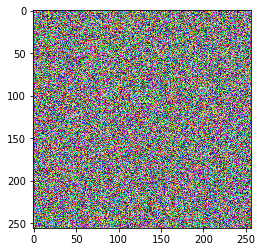

In [18]:
imshow(cipher_img)

In [19]:
import matplotlib
# matplotlib.image.imsave('images/baboon/encrypt.jpg', cipher_img, dpi = 600)

## Histogram

In [20]:
# import matplotlib.pyplot as plt
# plt.hist(img_arr.ravel(),256,[0,256])
# plt.show()

In [21]:
# plt.hist(cipher_img.ravel(),256,[0,256]) 
# plt.savefig('images/tulips/hist.jpg', dpi = 600, bbox_inches='tight')
# plt.show()

In [22]:
# imshow(cipher_img1 - cipher_img)

## Decrypt

In [23]:
start = time.time()
plain_img = decrypt_image(cipher_img, og_key)
end = time.time()
print(end-start)

2.1806159019470215


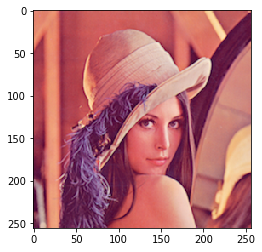

In [24]:
imshow(plain_img)

In [25]:
# matplotlib.image.imsave('images/tulips/decrypt.jpg', plain_img, dpi = 600)

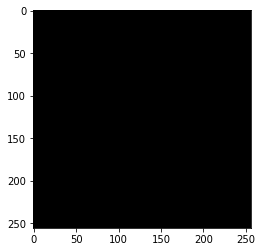

In [26]:
imshow(img_arr - plain_img)

## Key Sensitivity

In [27]:
# og_key_sensitive = '10101111001100001100111010000011001100110011111111110000001110011010101100001010111000011111100101011001110111110001101011110010'


In [28]:
# len(og_key_sensitive)

In [29]:
# cipher_img_sensitive = encrypt_image(img_arr, og_key_sensitive)

In [30]:
# imshow(cipher_img_sensitive)

In [31]:
# matplotlib.image.imsave('images/baboon/encrypt_sensitive.jpg', cipher_img_sensitive, dpi = 600)

In [32]:
# imshow(cipher_img - cipher_img_sensitive)

In [33]:
# matplotlib.image.imsave('images/baboon/encrypt_sensitive_diff.jpg', (cipher_img - cipher_img_sensitive), dpi = 600)

In [34]:
# diff = img_arr - plain_img

# for i in range(img_arr.shape[0]):
#     for j in range(img_arr.shape[1]):
#         for k in range(img_arr.shape[2]):
#             if diff[i,j,k] != 0:
#                 print(i,j,k)

## Entropy

In [80]:
import skimage.measure    

entropy = skimage.measure.shannon_entropy(cipher_img)

In [81]:
round(entropy, 7)

7.9989901

## Correlation

In [37]:
# E_p = 0
# E_q = 0
# for i in range(255):
#     for j in range(256):
#         for k in range(3):
#             E_p += cipher_img[i,j,k]
#             E_q += cipher_img[i+1,j,k]
            
# E_p = E_p / (255*256*3)
# E_q = E_q / (255*256*3)

In [38]:
# cov = 0
# for i in range(255):
#     for j in range(256):
#         for k in range(3):
#             cov += (cipher_img[i,j,k] - E_p)*(cipher_img[i+1,j,k] - E_q)
            
# cov = cov / (255*256*3)

In [39]:
# D_p = 0
# D_q = 0
# for i in range(255):
#     for j in range(256):
#         for k in range(3):
#             D_p += (cipher_img[i,j,k] - E_p)**2
#             D_q += (cipher_img[i+1,j,k] - E_q)**2
            
# D_p = D_p / (255*256*3)
# D_q = D_q / (255*256*3)

In [40]:
# corr = cov / (math.pow(D_p, 0.5) * math.pow(D_q, 0.5))

In [41]:
# corr

In [42]:
# E_p = 0
# E_q = 0
# for i in range(256):
#     for j in range(255):
#         for k in range(3):
#             E_p += cipher_img[i,j,k]
#             E_q += cipher_img[i,j+1,k]
            
# E_p = E_p / (255*256*3)
# E_q = E_q / (255*256*3)

# cov = 0
# for i in range(256):
#     for j in range(255):
#         for k in range(3):
#             cov += (cipher_img[i,j,k] - E_p)*(cipher_img[i,j+1,k] - E_q)
            
# cov = cov / (255*256*3)

# D_p = 0
# D_q = 0
# for i in range(256):
#     for j in range(255):
#         for k in range(3):
#             D_p += (cipher_img[i,j,k] - E_p)**2
#             D_q += (cipher_img[i,j+1,k] - E_q)**2
            
# D_p = D_p / (255*256*3)
# D_q = D_q / (255*256*3)

# corr = cov / (math.pow(D_p, 0.5) * math.pow(D_q, 0.5))

# corr

In [43]:
# E_p = 0
# E_q = 0
# for i in range(255):
#     for j in range(255):
#         for k in range(3):
#             E_p += cipher_img[i,j,k]
#             E_q += cipher_img[i+1,j+1,k]
            
# E_p = E_p / (255*255*3)
# E_q = E_q / (255*255*3)

# cov = 0
# for i in range(255):
#     for j in range(255):
#         for k in range(3):
#             cov += (cipher_img[i,j,k] - E_p)*(cipher_img[i+1,j+1,k] - E_q)
            
# cov = cov / (255*255*3)

# D_p = 0
# D_q = 0
# for i in range(255):
#     for j in range(255):
#         for k in range(3):
#             D_p += (cipher_img[i,j,k] - E_p)**2
#             D_q += (cipher_img[i+1,j+1,k] - E_q)**2
            
# D_p = D_p / (255*255*3)
# D_q = D_q / (255*255*3)

# corr = cov / (math.pow(D_p, 0.5) * math.pow(D_q, 0.5))

In [44]:
# corr

In [45]:
# for i in range(45,101):
#     for j in range(45,101):
#         for k in range(3):
#             plt.scatter(img_arr[i,j,k], img_arr[i+1, j, k], s = 0.5, c = 'blue')
# plt.title('Horizontal')    
# plt.savefig('images/baboon/horizontal_og.jpg', dpi = 600, bbox_inches='tight')
# plt.show()

In [46]:
# import matplotlib.pyplot as plt
# for i in range(45,101):
#     for j in range(45,101):
#         for k in range(3):
#             plt.scatter(cipher_img[i,j,k], cipher_img[i+1, j, k], s = 0.5, c = 'blue')
# plt.title('Horizontal')  
# plt.savefig('images/baboon/horizontal_encrypted.jpg', dpi = 600, bbox_inches='tight')
# plt.show()

In [47]:
# for i in range(45,90):
#     for j in range(50,90):
#         for k in range(3):
#             plt.scatter(img_arr[i,j,k], img_arr[i, j+1, k], s = 0.5, c = 'blue')

# plt.title('Vertical')    
# plt.savefig('images/baboon/vertical_og.jpg', dpi = 600, bbox_inches='tight')
# plt.show()

In [48]:
# for i in range(45,90):
#     for j in range(50,90):
#         for k in range(3):
#             plt.scatter(cipher_img[i,j,k], cipher_img[i, j+1, k], s = 0.5, c = 'blue')
# plt.title('Vertical')    
# plt.savefig('images/baboon/vertical_encrypted.jpg', dpi = 600, bbox_inches='tight')            
# plt.show()

In [49]:
# for i in range(50):
#     for j in range(50):
#         for k in range(3):
#             plt.scatter(img_arr[i,j,k], img_arr[i+1, j+1, k], s = 0.5, c = 'blue')
# plt.title('Diagonal')    
# plt.savefig('images/baboon/diagonal_og.jpg', dpi = 600, bbox_inches='tight')            
# plt.show()

In [50]:
# for i in range(50):
#     for j in range(50):
#         for k in range(3):
#             plt.scatter(cipher_img[i,j,k], cipher_img[i+1, j+1, k], s = 0.5, c = 'blue')
# plt.title('Diagonal')    
# plt.savefig('images/baboon/diagonal_encrypted.jpg', dpi = 600, bbox_inches='tight')            
# plt.show()

## Degree of Scrambling

In [51]:
#DoS
# def get_dos(cipher_img, img_arr):
    
#     cipher_img = cipher_img / 255
#     img_arr = img_arr / 255
    
#     s1 = 0
#     for k in range(3):
#         s = 0
#         for i in range(1, img_arr.shape[0]-2):
#             for j in range(1, img_arr.shape[1]-2):
#                 f1 = abs(((cipher_img[i-1,j,k] - cipher_img[i,j,k])**2) - ((img_arr[i-1,j,k] - img_arr[i,j,k])**2))
#                 f2 = abs(((cipher_img[i+1,j,k] - cipher_img[i,j,k])**2) - ((img_arr[i+1,j,k] - img_arr[i,j,k])**2))
#                 f3 = abs(((cipher_img[i,j-1,k] - cipher_img[i,j,k])**2) - ((img_arr[i,j-1,k] - img_arr[i,j,k])**2))
#                 f4 = abs(((cipher_img[i,j+1,k] - cipher_img[i,j,k])**2) - ((img_arr[i,j+1,k] - img_arr[i,j,k])**2))

#                 r = f1+f2+f3+f4
#                 s += r

#         s = s / ((img_arr.shape[0]-2)*(img_arr.shape[1]-2))
#         s1 += s

#     return s1/3

In [52]:
# dos = get_dos(cipher_img, img_arr)

In [53]:
# dos

## Differential Attack

In [54]:
img_arr[100][100]

array([129,  50,  91], dtype=uint8)

In [55]:
img_arr_changed = img_arr.copy()
img_arr_changed[100][100] = [160, 250, 9]
# img_arr_changed[100][101] = [1, 250, 1]
# img_arr_changed[101][100] = [121, 20, 129]
# img_arr_changed[101][101] = [16, 213, 39]

In [56]:
# imshow(img_arr-img_arr_changed)

In [57]:
# matplotlib.image.imsave('images/baboon/changed_differential.jpg', img_arr_changed, dpi = 600)

In [58]:
# matplotlib.image.imsave('images/baboon/og_differential_difference.jpg', img_arr-img_arr_changed, dpi = 600)

In [59]:
cipher_img1 = encrypt_image(img_arr_changed, og_key)

In [60]:
# imshow(cipher_img1)

In [61]:
# matplotlib.image.imsave('images/baboon/encrypt_differential.jpg', cipher_img1, dpi = 600)

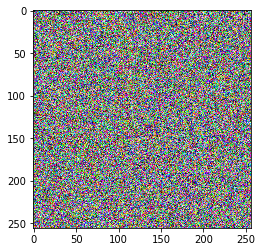

In [62]:
imshow(cipher_img1 - cipher_img)

In [63]:
# matplotlib.image.imsave('images/baboon/encrypt_difference.jpg', cipher_img - cipher_img1, dpi = 600)

In [64]:
# def get_npcr(cipher_img1, cipher_img):
    
#     npcr_ = 0
#     npcr_li = []
#     for k in range(cipher_img1.shape[2]):   
#         npcr = 0
#         for i in range(cipher_img1.shape[0]):
#             for j in range(cipher_img1.shape[1]):
#                 if cipher_img1[i,j,k] != cipher_img[i,j,k]:
#                     npcr += 1
#                     npcr_ += 1
#         npcr_li.append(round((npcr * 100)/ (cipher_img1.shape[0] * cipher_img1.shape[1]), 6))
# #     print(npcr)
#     npcr_ = (npcr_ * 100)/ (cipher_img1.shape[0] * cipher_img1.shape[1] * 3)
    
#     return npcr_li, round(npcr_ , 6)

# get_npcr(cipher_img1, cipher_img)

In [65]:
# import sys

# def get_uaci(cipher_img1, cipher_img):
#     cipher_img = cipher_img / 255
#     cipher_img1 = cipher_img1 / 255
#     uaci_ = 0.0
#     uaci_li = []
#     for k in range(cipher_img1.shape[2]):
#         uaci = 0
#         for i in range(cipher_img1.shape[0]):
#             for j in range(cipher_img1.shape[1]):
#                 uaci += abs(cipher_img1[i,j,k] - cipher_img[i,j,k])
#                 uaci_ += abs(cipher_img1[i,j,k] - cipher_img[i,j,k])
#         uaci_li.append(round(uaci / (cipher_img.shape[0] * cipher_img.shape[1]), 6))
#     uaci_ = uaci_ / (cipher_img.shape[0] * cipher_img.shape[1] * 3)
#     return uaci_li, round(uaci_, 6)

# get_uaci(cipher_img1, cipher_img)

## MSE

In [66]:
# def mse(imageA, imageB):

#     err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
#     err /= float(imageA.shape[0] * imageA.shape[1])
    
#     return err

In [67]:
# err = mse(img_arr, cipher_img)

In [68]:
# err

## SSIM

In [69]:
# from skimage.measure import compare_ssim as ssim
# s = ssim(img_arr, cipher_img, multichannel = True)

In [70]:
# s

## PSNR

In [71]:
# from math import log10, sqrt

# def PSNR(original, compressed):
#     err = mse(original, compressed)
#     if(err == 0):  # MSE is zero means no noise is present in the signal .
#                   # Therefore PSNR have no importance.
#         return 100
#     max_pixel = 255.0
#     psnr = 20 * log10(max_pixel / sqrt(err))
#     return psnr

In [72]:
# psnr = PSNR(img_arr, cipher_img)

In [73]:
# psnr

In [74]:
# def get_npcr(cipher_img1, cipher_img):
    
#     npcr = 0
    
#     for i in range(cipher_img1.shape[0]):
#         for j in range(cipher_img1.shape[1]):
#             for k in range(cipher_img1.shape[2]):
#                 if cipher_img1[i,j,k] != cipher_img[i,j,k]:
#                     npcr += 1
# #     print(npcr)
#     npcr = (npcr * 100)/ (cipher_img1.shape[0] * cipher_img1.shape[1] * 3)
    
#     return npcr

In [75]:
# get_npcr(cipher_img1, cipher_img)

In [76]:
# import sys

# def get_uaci(cipher_img1, cipher_img):
#     cipher_img = cipher_img / 255
#     cipher_img1 = cipher_img1 / 255
#     uaci = 0.0
#     for i in range(cipher_img1.shape[0]):
#         for j in range(cipher_img1.shape[1]):
#             for k in range(cipher_img1.shape[2]):
#                 uaci += abs(cipher_img1[i,j,k] - cipher_img[i,j,k])

#     uaci = uaci / (cipher_img.shape[0] * cipher_img.shape[1] * 3)
#     return uaci

In [77]:
# get_uaci(cipher_img1, cipher_img)

In [78]:
# for i in range(key.shape[0]):
#     for j in range(key.shape[1]):
#         for k in range(key.shape[2]):
#             if key[i,j,k] != key1[i,j,k]:
#                 print(i,j,k)
            

In [79]:
# diff = img_arr - plain_img

# for i in range(img_arr.shape[0]):
#     for j in range(img_arr.shape[1]):
#         for k in range(img_arr.shape[2]):
#             if diff[i,j,k] != 0:
#                 print(i,j,k)